# TSLA Stock Analysis Project

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

## Data Scraping

The following code uses the `yfinance` library to scrape historical stock data for Tesla (TSLA) from Yahoo Finance. The data includes daily open, high, low, close prices, and trading volume from 2020 to December 2023. It saves the data as a CSV file for later use.

In [2]:
# Download TSLA stock data
start_date = '2020-01-01'
end_date = '2023-12-01'

tsla_data = yf.download('TSLA', start=start_date, end=end_date)
tsla_data.head(6)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2020-01-02,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,32.809334,33.232666,31.215334,31.580000,467164500
2020-01-09,32.089333,32.089333,33.253334,31.524668,33.139999,426606000


## Visualization

This code visualizes TSLA's historical stock data. It includes:
1. A line plot of closing prices over time.
2. Moving averages (50-day and 200-day) to show trends.
3. Trading volume over time to indicate market activity levels.

<Figure size 1200x600 with 0 Axes>

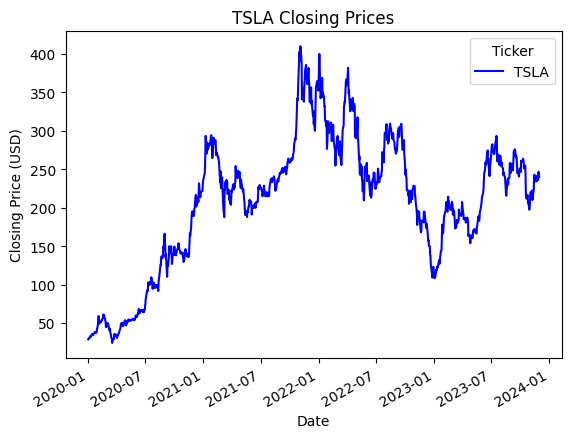

In [3]:
# Plot stock closing price
plt.figure(figsize=(12, 6))
tsla_data['Close'].plot(title='TSLA Closing Prices', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

<Figure size 1200x600 with 0 Axes>

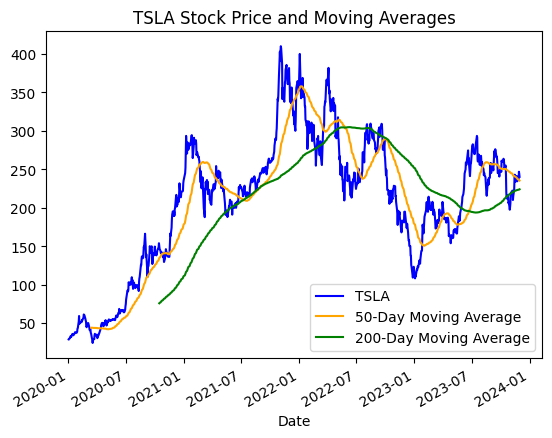

In [4]:
# Plot moving averages
tsla_data['50_MA'] = tsla_data['Close'].rolling(window=50).mean()
tsla_data['200_MA'] = tsla_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
tsla_data['Close'].plot(label='Closing Price', color='blue')
tsla_data['50_MA'].plot(label='50-Day Moving Average', color='orange')
tsla_data['200_MA'].plot(label='200-Day Moving Average', color='green')
plt.legend()
plt.title('TSLA Stock Price and Moving Averages')
plt.show()

<Figure size 1200x600 with 0 Axes>

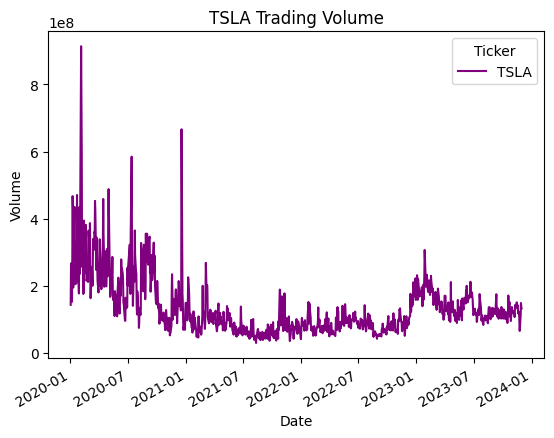

In [5]:
# Plot trading volume
plt.figure(figsize=(12, 6))
tsla_data['Volume'].plot(title='TSLA Trading Volume', color='purple')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

## Enhancing Datasets with Feature Generation Techniques

This code enhances the dataset by:
1. Generating time-based features (day of the week, day, and month).
2. Calculating growth rates over weekly, monthly, and yearly periods.

In [6]:
# Generate additional time-based features
tsla_data['Day_of_Week'] = tsla_data.index.dayofweek
tsla_data['Day'] = tsla_data.index.day
tsla_data['Month'] = tsla_data.index.month

In [7]:
# Calculate growth over periods
tsla_data['Weekly_Growth'] = tsla_data['Close'].pct_change(periods=5)
tsla_data['Monthly_Growth'] = tsla_data['Close'].pct_change(periods=21)
tsla_data['Yearly_Growth'] = tsla_data['Close'].pct_change(periods=252)

# Comprehensive Descriptive Analysis for TSLA Stock Data

In [8]:
# Descriptive statistics
print("Descriptive Statistics:")
tsla_data.describe()

Descriptive Statistics:


Price,Adj Close,Close,High,Low,Open,Volume,50_MA,200_MA,Day_of_Week,Day,Month,Weekly_Growth,Monthly_Growth,Yearly_Growth
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,,,
count,986.000000,986.000000,986.000000,986.000000,986.000000,9.860000e+02,937.000000,787.000000,986.000000,986.000000,986.000000,981.000000,965.000000,734.000000
mean,208.355344,208.355344,213.193471,203.272640,208.433408,1.335941e+08,212.157804,224.265645,2.026369,15.748479,6.443205,0.015688,0.068489,0.877619
std,86.484546,86.484546,88.401561,84.640112,86.677088,8.944480e+07,80.020628,57.552289,1.394447,8.784367,3.375835,0.102562,0.244161,1.766605
min,24.081333,24.081333,26.990667,23.367332,24.980000,2.940180e+07,41.833187,75.652747,0.000000,1.000000,1.000000,-0.430459,-0.579194,-0.715848
25%,153.754166,153.754166,160.527496,148.154163,153.402500,7.624642e+07,165.487200,196.595617,1.000000,8.000000,3.250000,-0.045079,-0.109151,-0.133945
50%,222.018333,222.018333,226.998337,216.891663,222.851662,1.070412e+08,228.521867,221.803800,2.000000,16.000000,6.000000,0.009509,0.035946,0.210278
75%,264.470009,264.470009,269.057487,259.698341,265.000000,1.597189e+08,258.598800,272.283934,3.000000,23.000000,9.000000,0.070258,0.202081,1.015143
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08,357.870532,304.789333,4.000000,31.000000,12.000000,0.564756,1.087066,8.141355


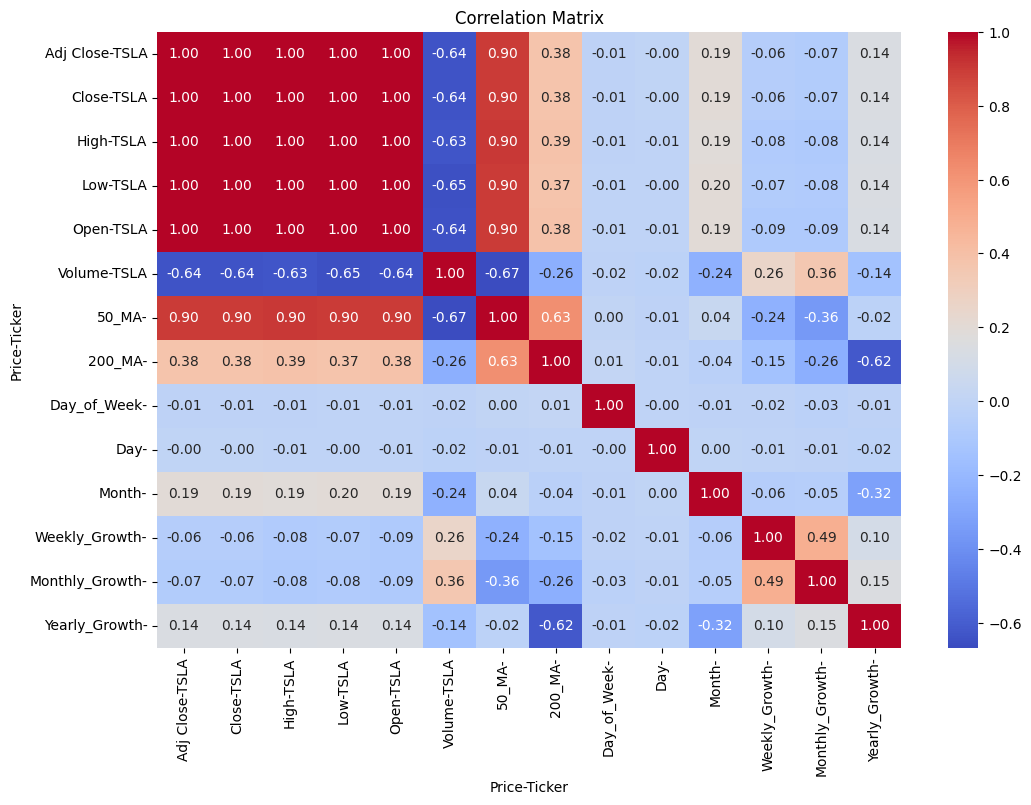

In [9]:
# Correlation matrix
correlation_matrix = tsla_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

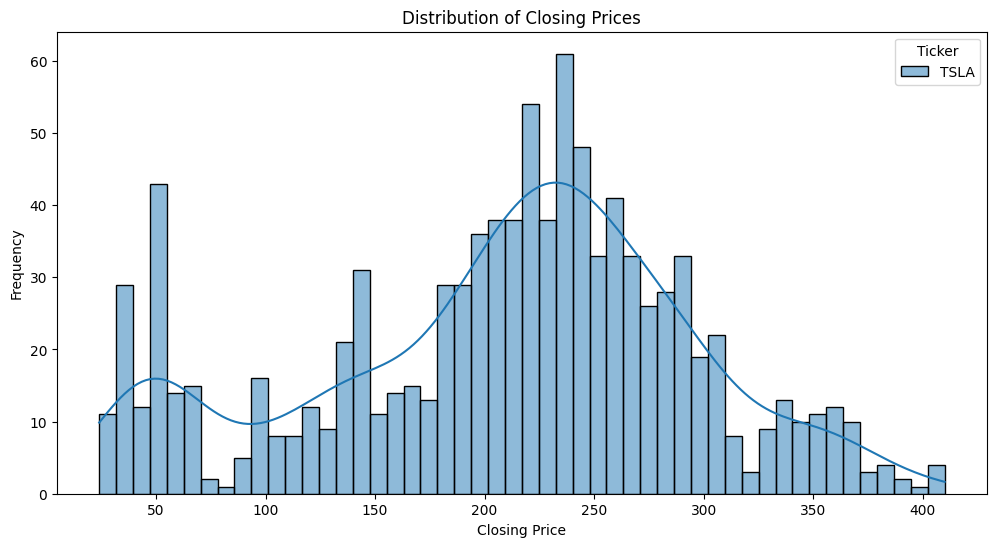

In [10]:
# Distribution of closing prices
plt.figure(figsize=(12, 6))
sns.histplot(tsla_data['Close'], kde=True, bins=50, color='blue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\amfua\AppData\Local\Temp\ipykernel_15028\23157244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=tsla_data['Month'], y=tsla_data['Close'].values.flatten(), palette='Set2')


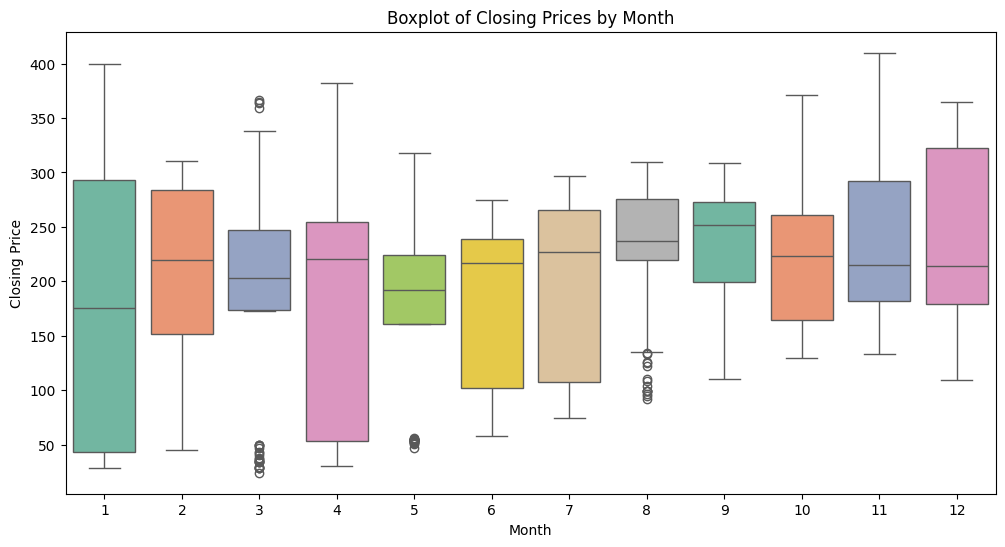

In [11]:
# Boxplot for closing price trends across months
plt.figure(figsize=(12, 6))
sns.boxplot(x=tsla_data['Month'], y=tsla_data['Close'].values.flatten(), palette='Set2')
plt.title('Boxplot of Closing Prices by Month')
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.show()

## Predicting stock closing price using Neural Networks

In [12]:
# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tsla_data['Close'].values.reshape(-1, 1))

In [13]:
# Create sequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Build the LSTM model
model = Sequential()

# Add an LSTM layer with 50 units and 'relu' activation
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Add a Dense layer with 1 unit for the prediction output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


c:\users\amfua\documents\python_projects\project_1\project_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1157
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0034
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0026
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0020
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0020
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018


**Description:** This code demonstrates the use of an LSTM (Long Short-Term Memory) neural network to predict TSLA stock prices. It preprocesses the data with scaling and sequence generation, trains the LSTM model, and evaluates predictions against actual values with a visual comparison.


In [16]:
# Get the last 'sequence_length' days from the test data to start prediction
last_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)  # Shape (1, seq_length, 1)

# List to store future predictions
future_predictions = []

# Predict the next 10 days
for _ in range(10):
    # Make prediction for the next day
    next_day_prediction = model.predict(last_sequence)
    
    # Append the predicted value to the future_predictions list
    future_predictions.append(next_day_prediction[0, 0])
    
    # Update the last_sequence to include the new prediction for the next loop
    # Shift the sequence left, and add the predicted value at the end
    last_sequence = np.append(last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions to the original price scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print the predictions for the next 10 days
print("Predicted TSLA Prices for the Next 10 Days:")
for i, price in enumerate(future_predictions):
    print(f"Day {i+1}: {price[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted TSLA Prices for the Next 10 Days:
Day 1: 235.57
Day 2: 235.68
Day 3: 235.49
Day 4: 235.09
Day 5: 234.54
Day 6: 233.89
Day 7: 233.17
Day 8: 232.40
Day 9: 231.60
Day 10: 230.77


In [17]:
data = tsla_data[['Close']]

In [18]:
tsla_data['Date'] = pd.to_datetime(tsla_data.index.date)

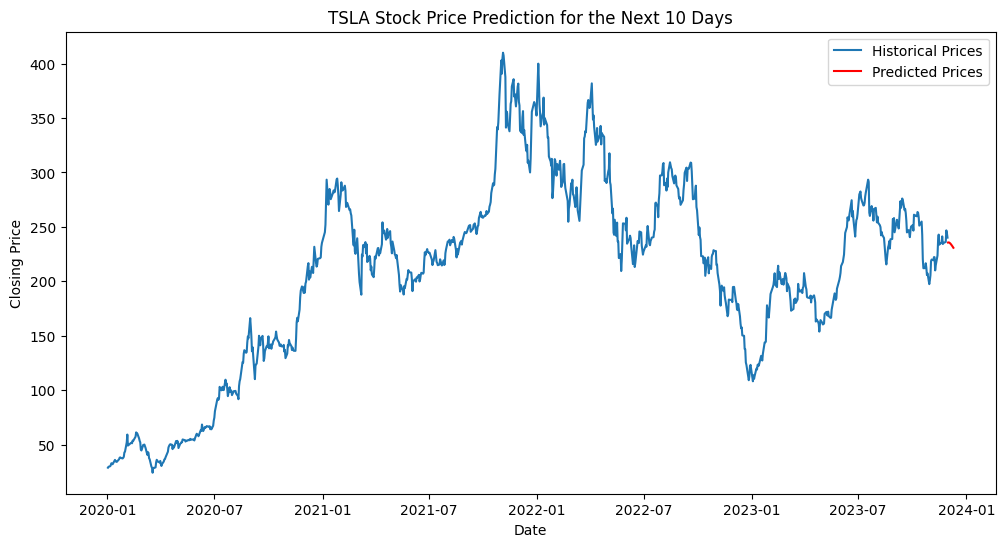

In [19]:
# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.plot(tsla_data['Date'], data['Close'], label='Historical Prices')
future_dates = pd.date_range(tsla_data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10)
plt.plot(future_dates, future_predictions, label='Predicted Prices', color='red')
plt.title("TSLA Stock Price Prediction for the Next 10 Days")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


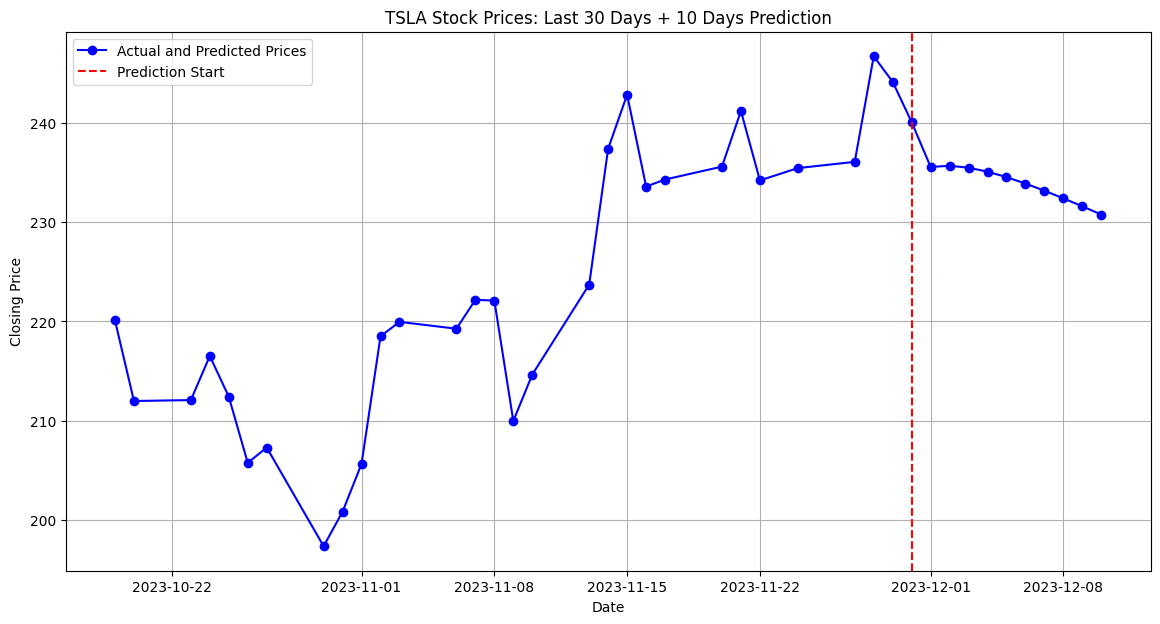

In [20]:
# Get the last 30 days of actual prices
last_30_days = scaler.inverse_transform(scaled_data[-30:])

# Combine the last 30 days with the 10-day predictions
plot_data = np.append(last_30_days, future_predictions)

# Generate corresponding days for plotting
last_30_dates = tsla_data.index[-30:]  # Assuming index is a DatetimeIndex
future_dates = pd.date_range(last_30_dates[-1] + pd.Timedelta(days=1), periods=10)

# Combine dates
all_dates = last_30_dates.tolist() + future_dates.tolist()

# Create a DataFrame for better plotting
plot_df = pd.DataFrame({
    'Date': all_dates,
    'Closing Price': plot_data.flatten()
})

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(plot_df['Date'], plot_df['Closing Price'], label='Actual and Predicted Prices', color='blue', marker='o')
plt.axvline(x=last_30_dates[-1], color='red', linestyle='--', label='Prediction Start')
plt.title("TSLA Stock Prices: Last 30 Days + 10 Days Prediction")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()


# Create a signal for Buy/Sell Stocks using MACD indicator

In [21]:
# Download TSLA stock data
start_date = '2020-01-01'
end_date = '2023-12-01'

tsla_data = yf.download('TSLA', start=start_date, end=end_date)
tsla_data.head(6)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2020-01-02,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,32.809334,33.232666,31.215334,31.580000,467164500
2020-01-09,32.089333,32.089333,33.253334,31.524668,33.139999,426606000


In [22]:
# Calculate MACD and Signal Line
short_window = 12
long_window = 26
signal_window = 9

tsla_data['EMA12'] = tsla_data['Close'].ewm(span=short_window, adjust=False).mean()
tsla_data['EMA26'] = tsla_data['Close'].ewm(span=long_window, adjust=False).mean()
tsla_data['MACD'] = tsla_data['EMA12'] - tsla_data['EMA26']
tsla_data['Signal_Line'] = tsla_data['MACD'].ewm(span=signal_window, adjust=False).mean()


In [23]:
tsla_data.head(3)

Price,Adj Close,Close,High,Low,Open,Volume,EMA12,EMA26,MACD,Signal_Line
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,,
2020-01-02,28.684000,28.684000,28.713333,28.114000,28.299999,142981500,28.684000,28.684000,0.000000,0.000000
2020-01-03,29.534000,29.534000,30.266666,29.128000,29.366667,266677500,28.814769,28.746963,0.067806,0.013561
2020-01-06,30.102667,30.102667,30.104000,29.333332,29.364668,151995000,29.012907,28.847386,0.165522,0.043953


In [24]:
# Buy/Sell Signals
signal = tsla_data['Signal_Line']        # Your signal line
macd   = tsla_data['MACD']        # The MACD that need to cross the signal line
#                                              to give you a Buy/Sell signal
listLongShort = ["No data"]    # Since you need at least two days in the for loop

for i in range(1, len(signal)):
    #                          # If the MACD crosses the signal line upward
    if macd[i] > signal[i] and macd[i - 1] <= signal[i - 1]:
        listLongShort.append("BUY")
    #                          # The other way around
    elif macd[i] < signal[i] and macd[i - 1] >= signal[i - 1]:
        listLongShort.append("SELL")
    #                          # Do nothing if not crossed
    else:
        listLongShort.append("HOLD")

tsla_data['Advice'] = listLongShort

C:\Users\amfua\AppData\Local\Temp\ipykernel_15028\716728745.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if macd[i] > signal[i] and macd[i - 1] <= signal[i - 1]:
C:\Users\amfua\AppData\Local\Temp\ipykernel_15028\716728745.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif macd[i] < signal[i] and macd[i - 1] >= signal[i - 1]:


In [25]:
tsla_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,EMA12,EMA26,MACD,Signal_Line,Advice
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,
Date,,,,,,,,,,,
2020-01-02,28.684000,28.684000,28.713333,28.114000,28.299999,142981500,28.684000,28.684000,0.000000,0.000000,No data
2020-01-03,29.534000,29.534000,30.266666,29.128000,29.366667,266677500,28.814769,28.746963,0.067806,0.013561,BUY
2020-01-06,30.102667,30.102667,30.104000,29.333332,29.364668,151995000,29.012907,28.847386,0.165522,0.043953,HOLD
2020-01-07,31.270666,31.270666,31.441999,30.224001,30.760000,268231500,29.360255,29.026888,0.333367,0.101836,HOLD
2020-01-08,32.809334,32.809334,33.232666,31.215334,31.580000,467164500,29.890882,29.307069,0.583813,0.198232,HOLD


In [26]:
tsla_data['Buy_Advice'] = np.where(tsla_data['Advice']=='BUY', True, False)
tsla_data['Sell_Advice'] = np.where(tsla_data['Advice']=='SELL', True, False)

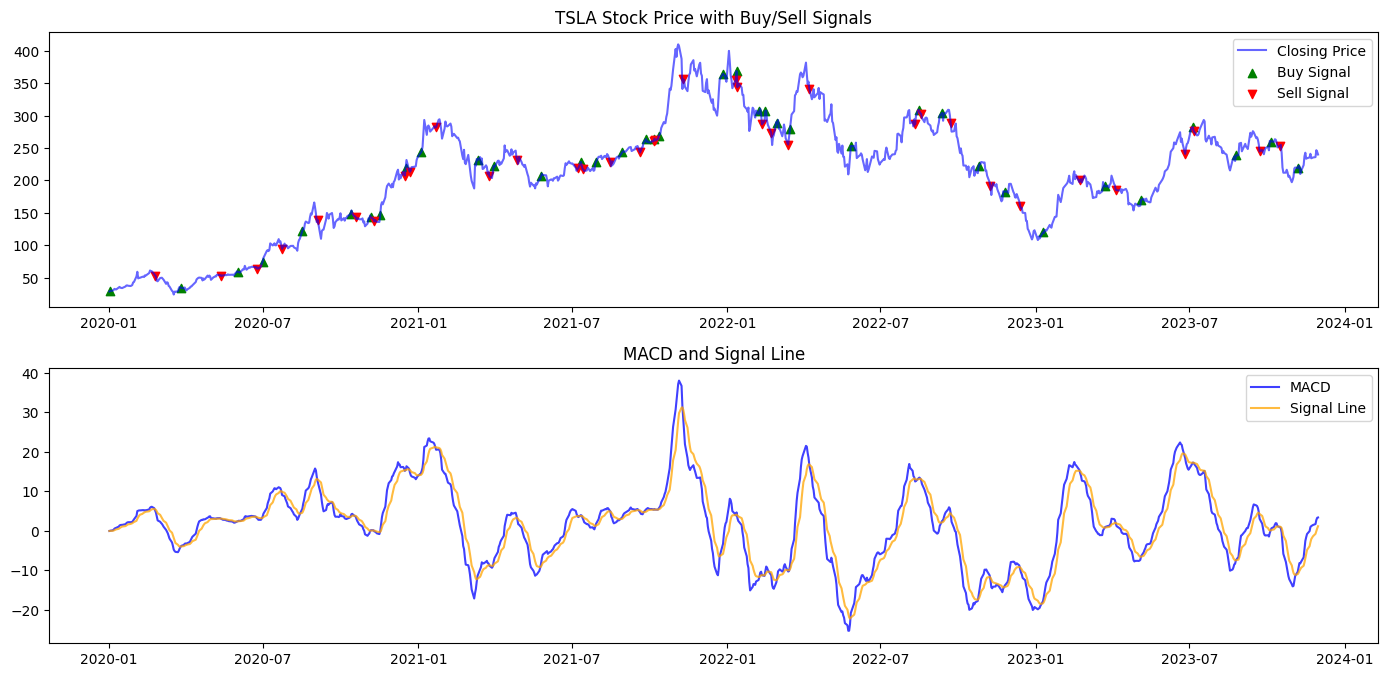

In [27]:
# Plotting
plt.figure(figsize=(14, 10))

# Price and Buy/Sell signals
plt.subplot(3, 1, 1)
plt.plot(tsla_data['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.scatter(tsla_data.index[tsla_data['Buy_Advice']], tsla_data['Close'][tsla_data['Buy_Advice']], label='Buy Signal', marker='^', color='green')
plt.scatter(tsla_data.index[tsla_data['Sell_Advice']], tsla_data['Close'][tsla_data['Sell_Advice']], label='Sell Signal', marker='v', color='red')
plt.title('TSLA Stock Price with Buy/Sell Signals')
plt.legend()

# MACD and Signal Line
plt.subplot(3, 1, 2)
plt.plot(tsla_data['MACD'], label='MACD', color='blue', alpha=0.75)
plt.plot(tsla_data['Signal_Line'], label='Signal Line', color='orange', alpha=0.75)
plt.title('MACD and Signal Line')
plt.legend()

plt.tight_layout()
plt.show()